In [1]:
import ROOT
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Welcome to JupyROOT 6.26/04


In [33]:
b_jet = (pd.read_csv("b_jet.csv")).to_numpy()
c_jet = (pd.read_csv("c_jet.csv")).to_numpy()

In [34]:
#Calculate ATLAS-score(ln(pc/pb))
b_ATLAS = np.log(np.divide(b_jet[:,1], b_jet[:,0]))
c_ATLAS = np.log(np.divide(c_jet[:,1], c_jet[:,0]))

In [35]:
print(np.max(b_ATLAS), np.min(b_ATLAS))
print(np.max(c_ATLAS), np.min(c_ATLAS))

4.878713769069703 -18.22017431108134
5.803919115503613 -8.762951453483522


In [30]:
b_len, c_len = b_ATLAS.shape[0], c_ATLAS.shape[0]
thresholds = np.linspace(-5, 4, 100) #evenly space the score
result = []
for thresh in thresholds:
    #c-tagging threshold: if the score is bigger than the threshold value, we say this event is
    #c-jet event 
    c_eff = ((c_ATLAS > thresh).sum())/c_len
    b_eff = ((b_ATLAS < thresh).sum())/b_len
    b_rej = 1/b_eff
    result.append([c_eff, b_rej])
result = np.array(result)

In [36]:
b_CMS = np.divide(b_jet[:,1], b_jet[:,0]+b_jet[:,1])
c_CMS = np.divide(c_jet[:,1], c_jet[:,0]+c_jet[:,1])

(3578937,) (769322,) 3578937 769322


In [37]:
print(np.max(b_CMS), np.min(b_CMS))
print(np.max(c_CMS), np.min(c_CMS))

0.9924506346219661 1.2220214583879238e-08
0.9969933545495528 0.00015639778951254523


In [49]:
thresh_CMS = np.linspace(0.05, 0.95, 100) #evenly space the score
CMS = []
for thresh in thresh_CMS:
    #c-tagging threshold: if the score is bigger than the threshold value, we say this event is
    #c-jet event 
    c_eff_C= ((c_CMS > thresh).sum())/c_len #when score > threshold, identify this point as c-jet
    b_eff_C = ((b_CMS < thresh).sum())/b_len #when score < threshold, identify this point as b-jet
    b_rej_C = 1/b_eff_C
    CMS.append([c_eff_C, b_rej_C])
CMS = np.array(CMS)

In [50]:
#calculate efficiency for two discriminant method
#ATLAS-score
thresh_ATLAS = np.linspace(-5, 4, 100)
c_eff_ATLAS = np.array([np.count_nonzero((c_ATLAS > thresh)) for thresh in thresh_ATLAS])/c_len
b_eff_ATLAS = np.array([np.count_nonzero((b_ATLAS < thresh)) for thresh in thresh_ATLAS])/b_len
b_rej_ATLAS = 1/b_eff_ATLAS
#CMS-score
thresh_CMS = np.linspace(0.05, 0.95, 100)
c_eff_CMS = np.array([np.count_nonzero((c_CMS > thresh)) for thresh in thresh_CMS])/c_len
b_eff_CMS = np.array([np.count_nonzero((b_CMS < thresh)) for thresh in thresh_CMS])/b_len
b_rej_CMS = 1/b_eff_CMS

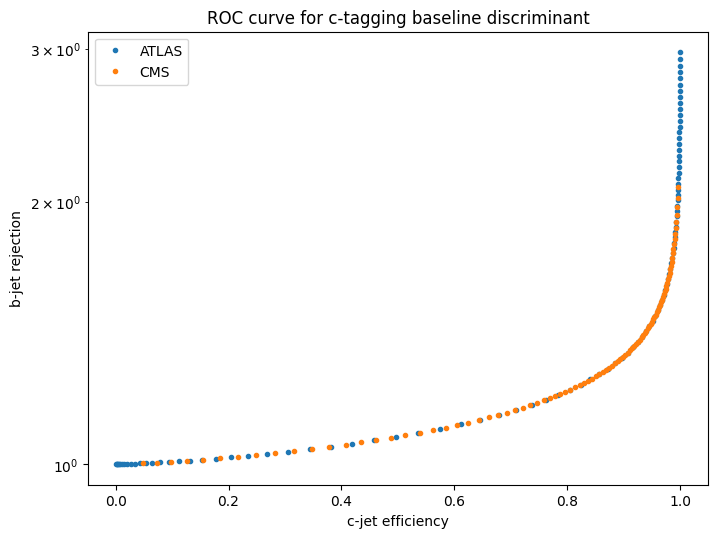

In [59]:
plt.figure(figsize=(8,6), dpi=100)
plt.plot(c_eff_ATLAS, b_rej_ATLAS, ".", label = "ATLAS")
plt.yscale("log", base = 10)
plt.xlabel("c-jet efficiency")
plt.ylabel("b-jet rejection")
plt.title("ROC curve for c-tagging baseline discriminant")
plt.plot(c_eff_CMS, b_rej_CMS, ".", label = "CMS")
#plt.plot(CMS[:, 0], CMS[:, 1], ".", label = "random shit")
#plt.plot(result[:, 0], result[:, 1], ".", label = "random bull shit")
plt.legend()
#plt.savefig("ROC_curve.png")

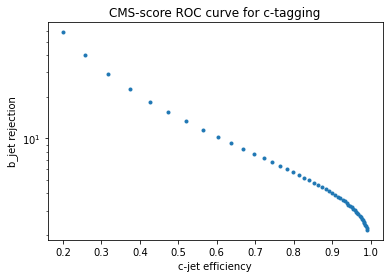